# Data 다루기

## 판다스를 활용한 데이터 조사

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("pima-indians-diabetes3.csv")
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [45]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


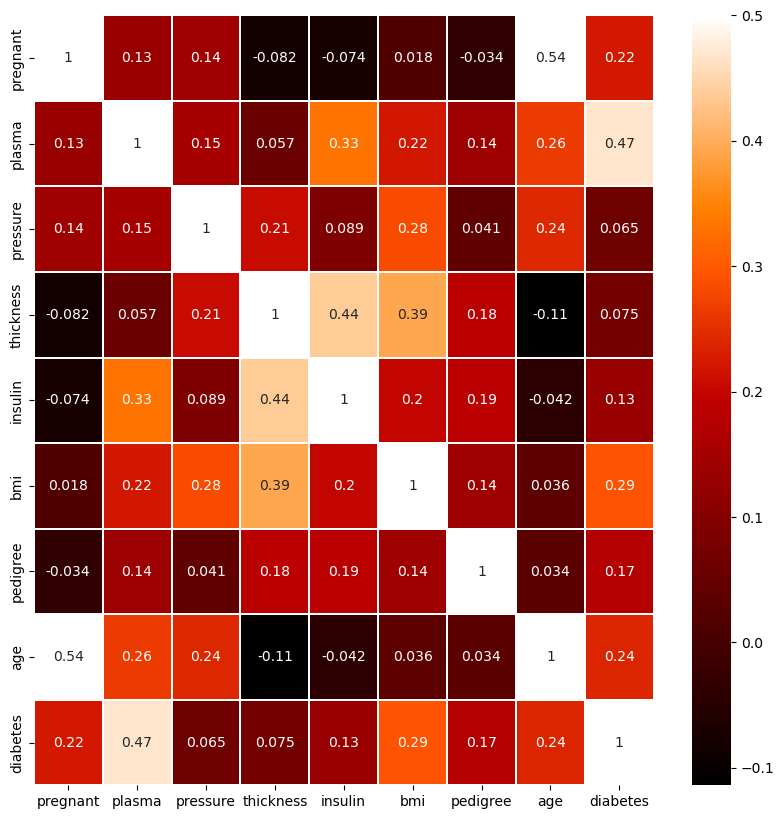

In [47]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

## 중요한 데이터 추출하기

<class 'pandas.core.series.Series'>	(500,)
<class 'pandas.core.series.Series'>	(268,)


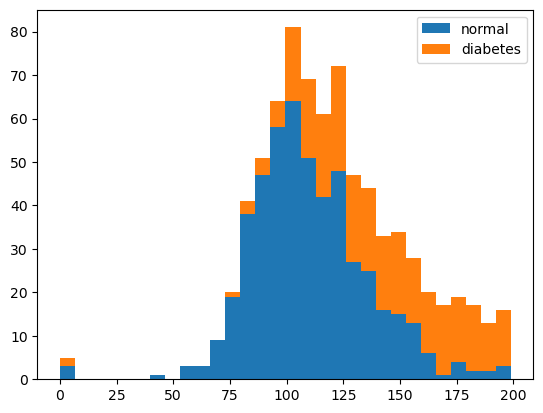

In [48]:
import warnings
warnings.filterwarnings("ignore")

x0 = df.plasma[df.diabetes==0]
x1 = df.plasma[df.diabetes==1]
print(type(x0), x0.shape, sep="\t")
print(type(x1), x1.shape, sep="\t")
plt.hist(x=[x0, x1], bins=30, histtype="barstacked", label=["normal", "diabetes"])
plt.legend()
plt.show()

## 피마 인디언 당뇨병 예측

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = df.iloc[:, 0:8]
y = df.iloc[:, 8]
print(type(x), x.shape)
print(type(y), y.shape)

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='dns1'))
model.add(Dense(8, activation='relu', name='dns2'))
model.add(Dense(1, activation='sigmoid', name='dns3'))
model.summary()

<class 'pandas.core.frame.DataFrame'> (768, 8)
<class 'pandas.core.series.Series'> (768,)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dns1 (Dense)                    │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dns2 (Dense)                    │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dns3 (Dense)                    │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, epochs=100, batch_size=8)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4883 - loss: 15.5345  
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.6432 - loss: 1.6731
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6510 - loss: 1.2645
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.6302 - loss: 1.1116
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.6445 - loss: 0.9476
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.6445 - loss: 0.8717
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.6380 - loss: 0.7966
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.6471 - loss: 0.7626
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.6523 - loss: 0.7681
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.6471 - loss: 0.7066
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.6562 - loss: 0.6631
Epoch 12/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s

In [51]:
result_list = model.evaluate(x, y)
print(type(result_list), result_list)
print("Accuracy = %.4f" % (result_list[1]), "Loss = %.4f" % (result_list[0]))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7331 - loss: 0.5316 
<class 'list'> [0.5315587520599365, 0.7330729365348816]
Accuracy = 0.7331 Loss = 0.5316


# END
- Accuracy = 0.7930 Loss = 0.4405
- Accuracy = 0.7617 Loss = 0.4973